This notebook is an adaptation of [2] and provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display images from the training and test sets.

Builds a fully connected network and shows results and after training



### Refs 

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification
    

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Auxiliary functions to show plots of training history and display images

In [4]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, images, labels):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(images[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
    
    
    
def show_image(number):
    plt.figure()
    plt.imshow(x_train[0], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [5]:

class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()
    
    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()
    

## Load the dataset from tensorflow collection of datasets 

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Display a few images

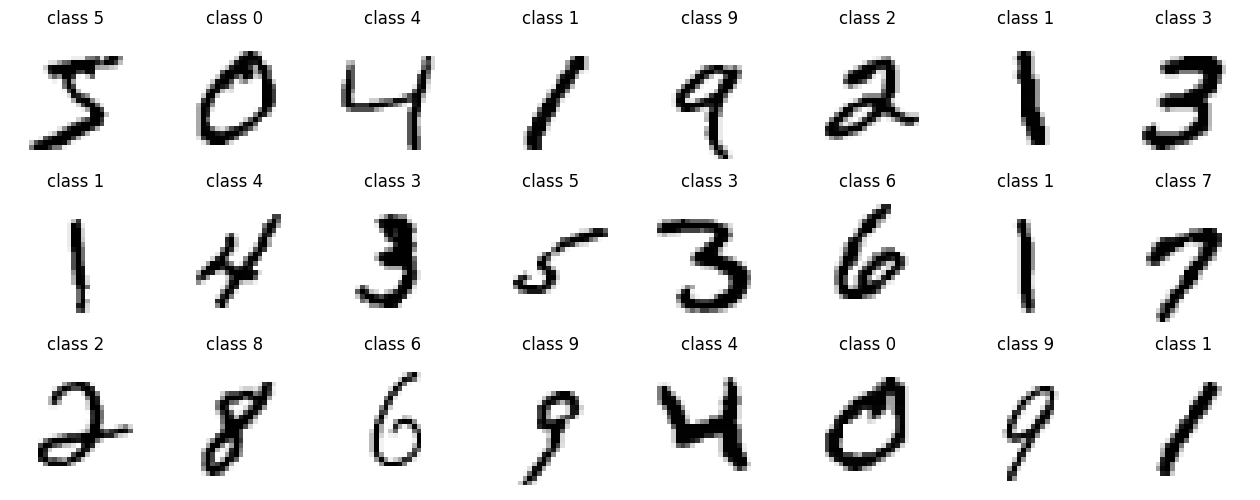

<Figure size 640x480 with 0 Axes>

In [8]:
show_images(3,8,x_train, y_train) 

# Data distribution per class

As can be seen from the result of the code below, the data is fairly distributed amongst the classes

In [10]:
from collections import Counter
dist_test, dist_train = Counter(y_test), Counter(y_train)
print(dist_test)
print(dist_train)

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


## Normalize the Input Data

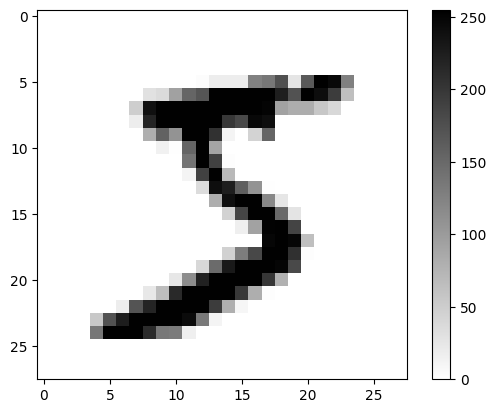

In [56]:
show_image(0)

In [57]:
x_train, x_test = x_train / 255.0, x_test / 255.0

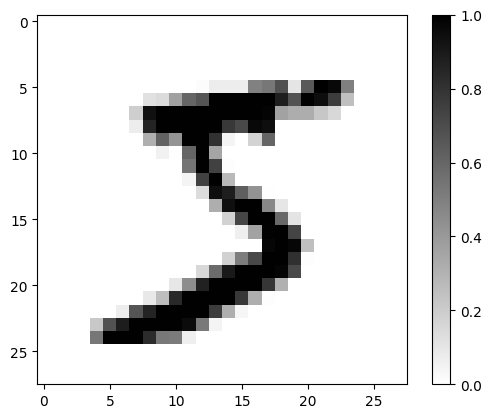

In [58]:
show_image(0)

# Create model

Single hidden layer with 64 units

In [59]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28), name='image_flatten'))
model.add(tf.keras.layers.Dense(64, activation='relu', name='hidden_layer'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='output_layer'))



Note: The activation name 'relu' corresponds to calling tf.keras.activations.relu

The string can be used as a shortcut. Tensorflow will call the function whose name matches the string



In [60]:
#see answer by Hirak Sarkar in https://stackoverflow.com/questions/56799561/how-can-i-find-the-list-of-available-string-abbreviations-for-keras-classes-used

for k, v in tf.keras.activations.__dict__.items():
    if not k[0].isupper() and not k[0] == "_":
        print(k)

deserialize
elu
exponential
gelu
get
hard_sigmoid
linear
relu
selu
serialize
sigmoid
softmax
softplus
softsign
swish
tanh


## Display model information

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_flatten (Flatten)     (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 64)                50240     
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


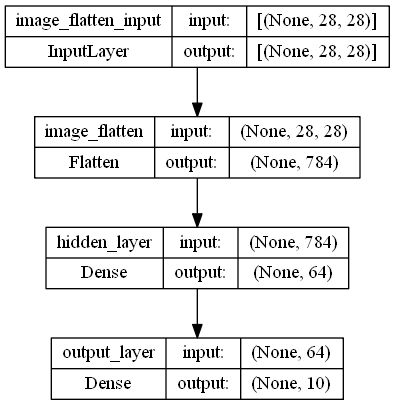

In [61]:
print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)

## Some predictions with an untrained model

In [62]:
predictions = model.predict(x_test)

print(predictions[0])



313/313 [==============================] - 0s 1ms/step
[0.09002621 0.09694993 0.21644376 0.05467951 0.09852025 0.09672976
 0.11913896 0.09410596 0.05465107 0.07875461]


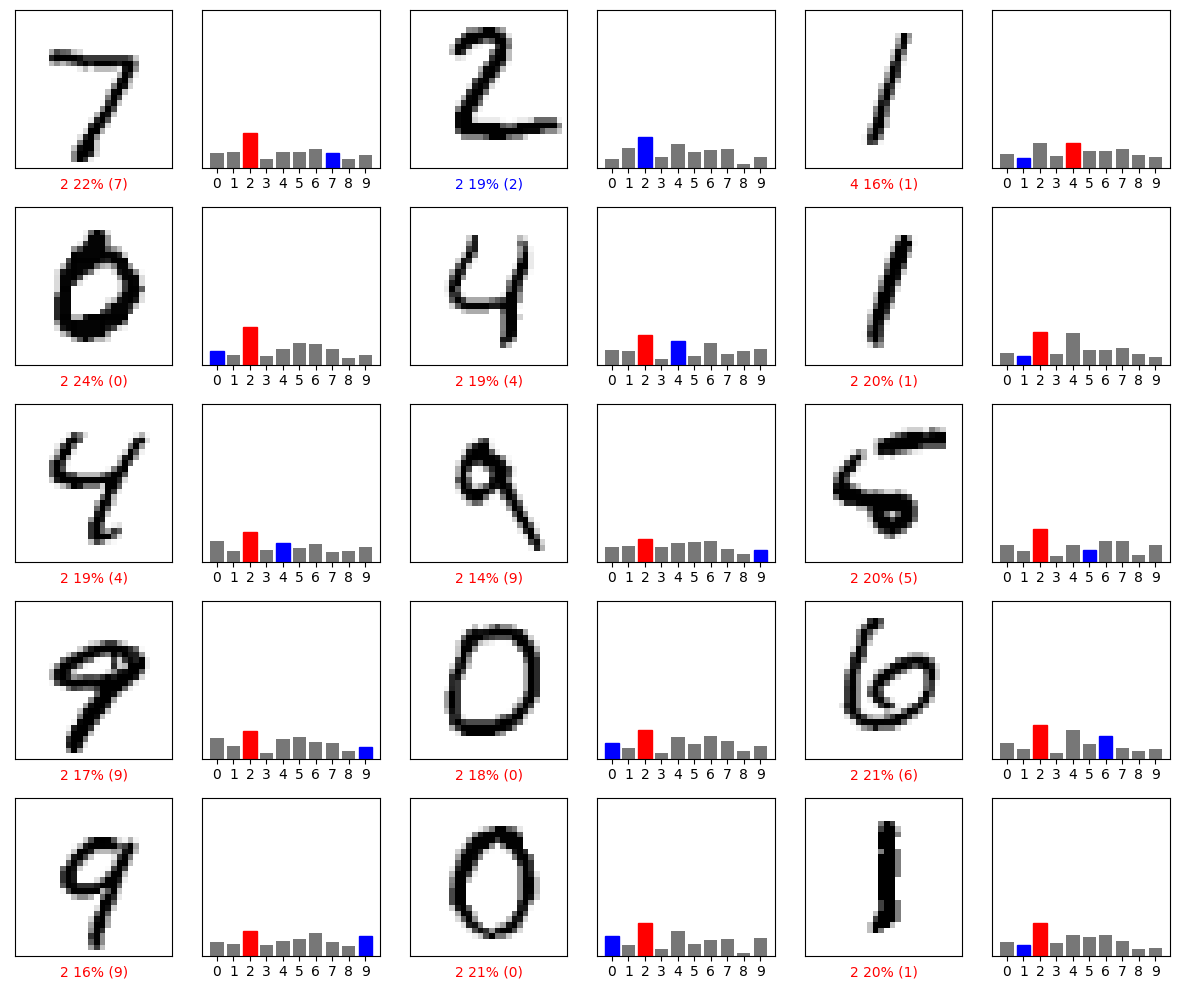

In [63]:
plot_predictions(predictions, y_test, 5, 3)

# Train the model with a custom loop

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=60000).batch(32)

@tf.function
def train_step(x,y):
    with tf.GradientTape() as tape:

        output = model(x)
        loss = loss_fn(y, output)
        
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
   
    return loss

def train(epochs):
    for epoch in range(epochs):
        loss = 0
        epoch_loss = 0
        for (x_batch, y_batch) in train_dataset:

            epoch_loss += train_step(x_batch, y_batch)

        print('Epoch :', epoch, " Loss:", epoch_loss.numpy() )

train(5)
                

Epoch : 0  Loss: 552.117
Epoch : 1  Loss: 263.4711
Epoch : 2  Loss: 189.61116
Epoch : 3  Loss: 149.10887
Epoch : 4  Loss: 124.59655


# Train using Tensorflow fit function

## Specify the optimizer, loss and metrics

optimizer: gradient descent optimization algorithm

loss: the loss function upon which derivatives are computed

metrics: metrics to be evaluated during tranining and evaluation

In [65]:
# list of metric strings

for k, v in tf.keras.metrics.__dict__.items():
    if not k[0].isupper() and not k[0] == "_":
        print(k)

# list of functions in https://www.tensorflow.org/api_docs/python/tf/keras/metrics        

binary_crossentropy
binary_focal_crossentropy
categorical_crossentropy
hinge
kl_divergence
kld
kullback_leibler_divergence
log_cosh
logcosh
mean_absolute_error
mae
mean_absolute_percentage_error
mape
mean_squared_error
mse
mean_squared_logarithmic_error
msle
poisson
sparse_categorical_crossentropy
squared_hinge
deserialize
get
serialize
binary_accuracy
categorical_accuracy
sparse_categorical_accuracy
sparse_top_k_categorical_accuracy
top_k_categorical_accuracy


In [66]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

eval = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0858 - accuracy: 0.9741 - 750ms/epoch - 2ms/step


## Training 

In [74]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0260 - accuracy: 0.9919
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223 - accuracy: 0.9930
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9948
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0129 - accuracy: 0.9961
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - accuracy: 0.9962
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - accuracy: 0.9971
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - accuracy: 0.9972
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.010

## History graphs for accuracy and loss


dict_keys(['loss', 'accuracy'])


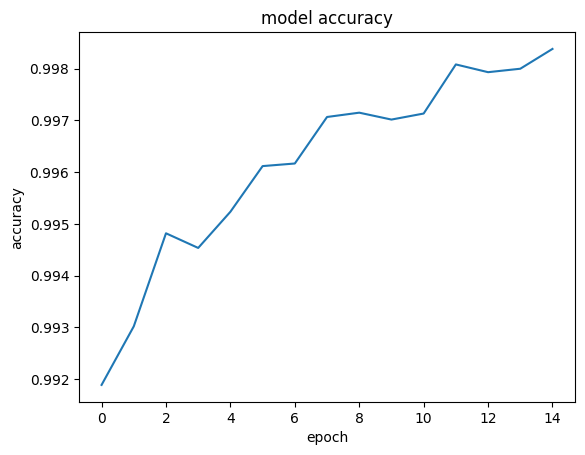

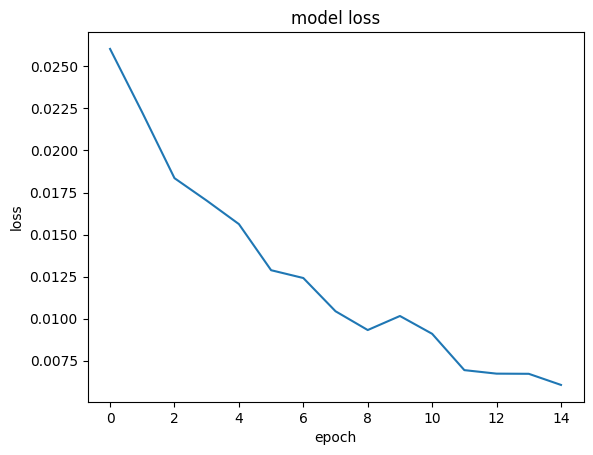

{'loss': [0.026036033406853676, 0.02225654385983944, 0.01835320144891739, 0.017019418999552727, 0.015622883103787899, 0.01288165058940649, 0.012417151592671871, 0.010441672056913376, 0.00932487566024065, 0.010160197503864765, 0.00910078827291727, 0.006941701285541058, 0.0067329443991184235, 0.006723165046423674, 0.006062512751668692], 'accuracy': [0.9918833374977112, 0.9930166602134705, 0.9948166608810425, 0.994533360004425, 0.9952333569526672, 0.9961166381835938, 0.9961666464805603, 0.9970666766166687, 0.9971500039100647, 0.9970166683197021, 0.9971333146095276, 0.9980833530426025, 0.9979333281517029, 0.9980000257492065, 0.9983833432197571]}


In [75]:
show_history(history)

print(history.history)


# Evaluate the model on the test set

In [76]:
eval1 = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1185 - accuracy: 0.9761 - 631ms/epoch - 2ms/step


313/313 [==============================] - 0s 1ms/step


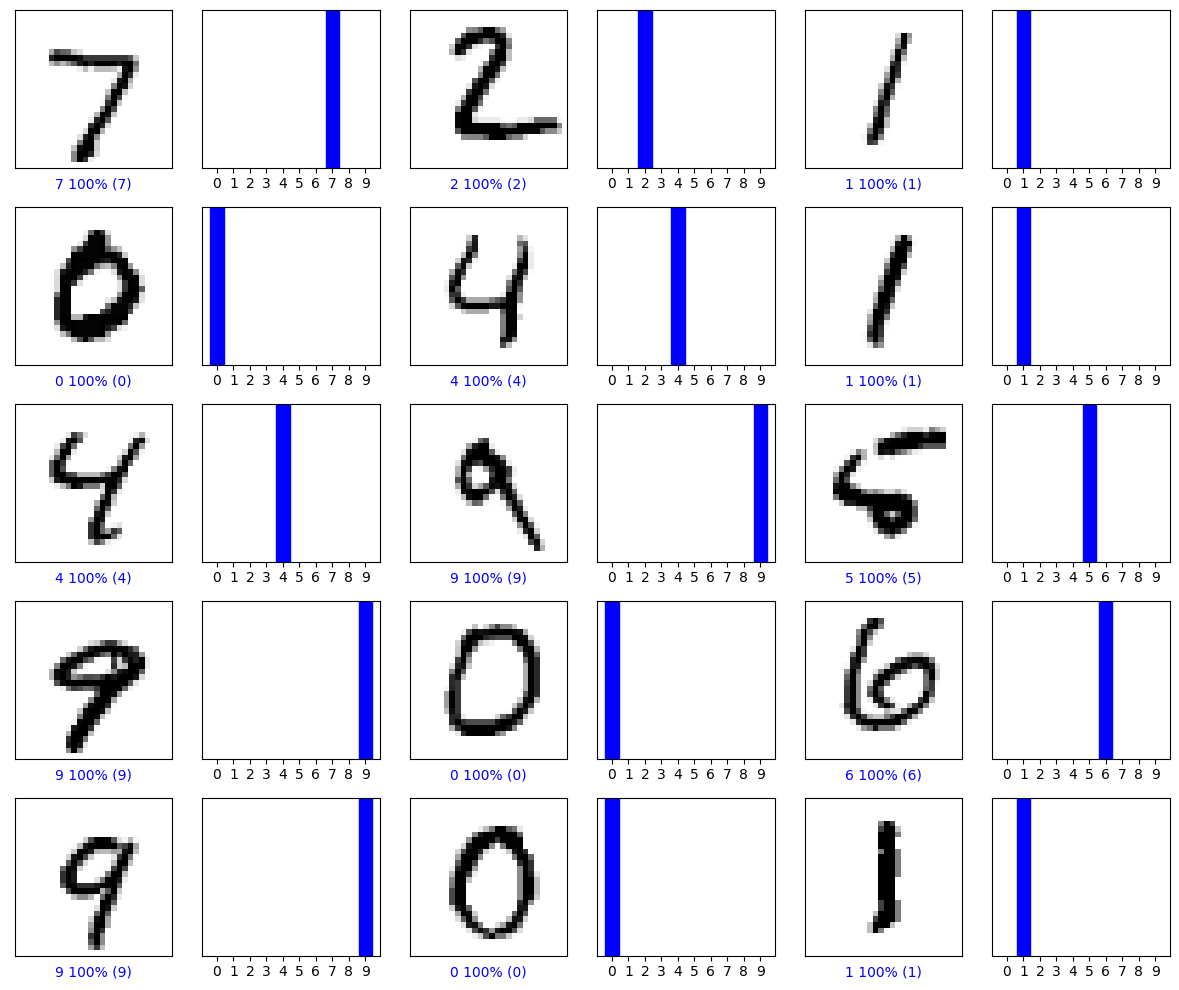

In [77]:
predictions = model.predict(x_test)
plot_predictions(predictions, y_test, 5, 3)

## Some misclassified samples

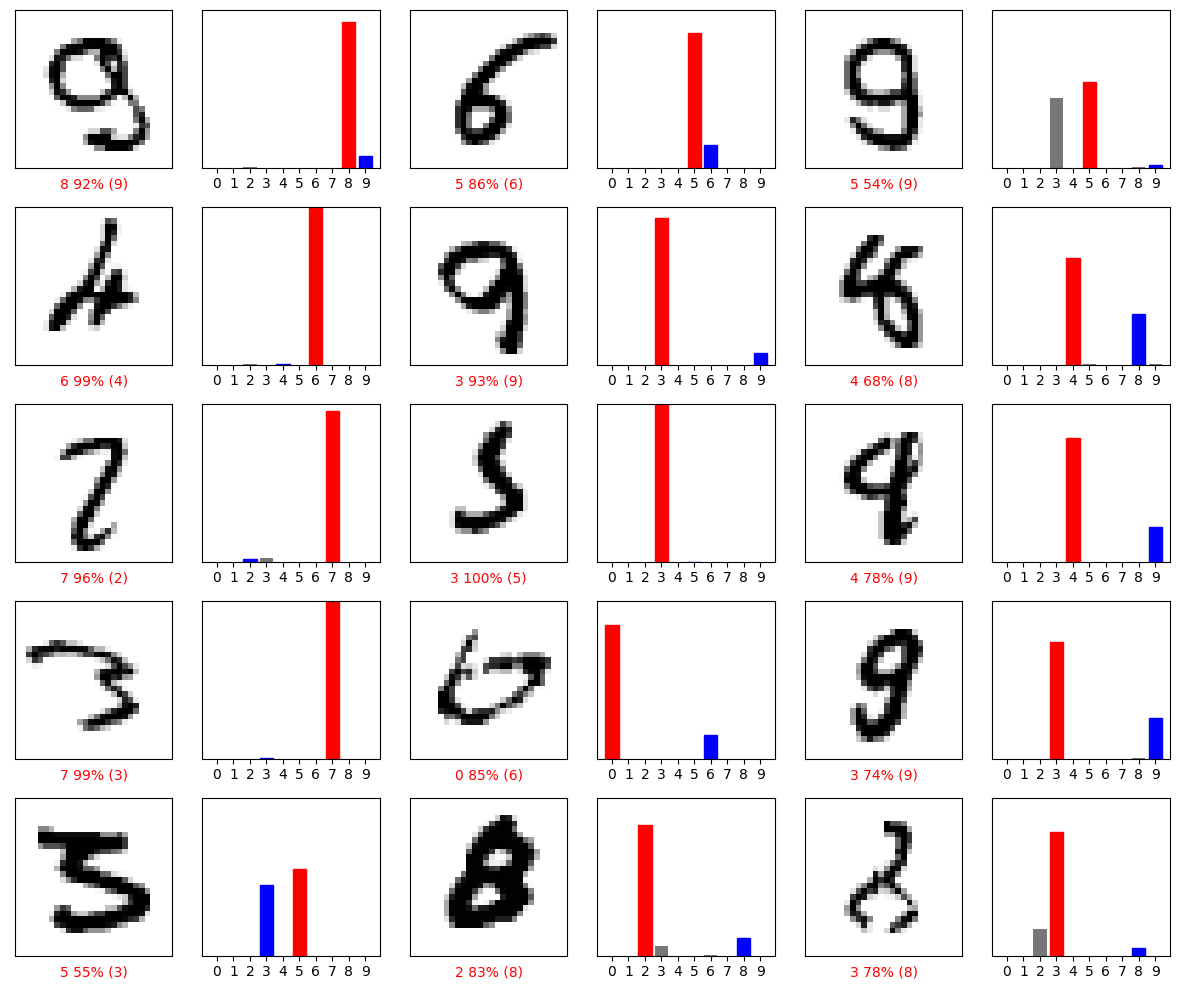

In [78]:
show_misclassified(predictions, y_test, 5, 3)

In [72]:
preds_sparse = [np.argmax(x) for x in predictions]

# Confusion Matrix

rows are labels, columns are predictions

In [73]:
conf_mat = tf.math.confusion_matrix(y_test, preds_sparse)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    0,    1,    6,    3,    4,    3,    0],
       [   0, 1125,    4,    0,    0,    0,    1,    1,    4,    0],
       [   0,    5, 1000,    4,    4,    0,    5,    6,    8,    0],
       [   0,    0,    2,  974,    0,   16,    0,    7,    5,    6],
       [   0,    0,    2,    1,  959,    0,    5,    3,    2,   10],
       [   1,    0,    0,    5,    1,  879,    2,    2,    2,    0],
       [   3,    3,    1,    1,    5,   11,  930,    0,    4,    0],
       [   0,    2,    8,    4,    1,    0,    0, 1006,    0,    7],
       [   5,    2,    3,    3,    4,    9,    1,    2,  942,    3],
       [   2,    3,    0,    4,    9,    9,    0,    4,    4,  974]])>

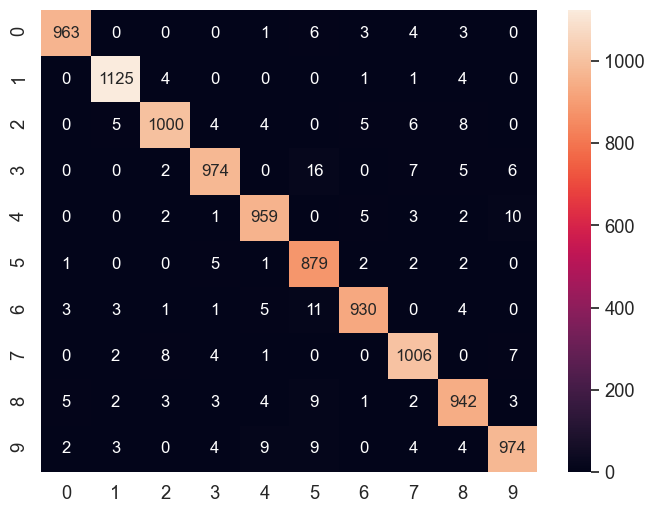

In [95]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(conf_mat.numpy(), range(10), range(10))
plt.figure(figsize=(8,6))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='d') # font size

plt.show()

In [94]:
from collections import Counter
res = Counter(y_test)
res

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})